# Whole cell vs nuclei comparisons

Jupyter notebook containing analyses for looking at rates of template switching in viral diversity libraries from Shin & Urbanek. Analyses correspond to !!!!!!

This notebook contains analyses related to examining rabies barcode dynamics using whole cell and nuclei dissociations w/ our nuclei-thethered barcoding strategy.

Input for this notebook requires:
1) Pooled embedding coordinates w/ metadata from ##_transcritpome_visualization
2) Rabies barcode matrices for datasets c1-c4 and n1-n4

Output for this notebook includes:
1) Plots related to number of rabies barcodes in pooled whole cell and nuclei data
2) Plots related to cell type distributions between datasets

Module and their versions used when generating figures for the paper can be found in 'requirements.txt', which is stored in our GitHub repository: !!!!!!

In [ ]:
This code was last amended by Maddie Urbanek on !!!!!

## Notebook set-up

In [15]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
from scipy import stats
from scipy.stats import ranksums
import os
import math
from scipy.stats import binomtest
from scipy.stats import entropy
from scipy.stats import binom

pd.options.mode.chained_assignment = None
import scanpy as sc
import anndata as ad


In [2]:
import os
os.chdir('/Users/maddieurbanek/Desktop/revision_data/resubmission/data/')

## Import datasets

### Load-in paired slice rabies experiments

In [4]:
#Rabies
c1=pd.read_table('./barcode_count_matrices/c1_completecounts.tsv',delimiter='\t')
c1['datasetid']='c1'
c1['CBC'] = c1['CBC'].str.replace("'", "")
c1['CBC'] = c1['CBC'].str.replace('b', 'c1_')
c1['barcode'] = 'c1_' + c1['barcode']

c2=pd.read_table('./barcode_count_matrices/c2_completecounts.tsv',delimiter='\t')
c2['datasetid']='c2'
c2['CBC'] = c2['CBC'].str.replace("'", "")
c2['CBC'] = c2['CBC'].str.replace('b', 'c2_')
c2['barcode'] = 'c2_' + c2['barcode']

n1=pd.read_table('./barcode_count_matrices/n1_completecounts.tsv',delimiter='\t')
n1['datasetid']='n1'
n1['CBC'] = n1['CBC'].str.replace("'", "")
n1['CBC'] = n1['CBC'].str.replace('b', 'n1_')
n1['barcode'] = 'n1_' + n1['barcode']

n2=pd.read_table('./barcode_count_matrices/n2_completecounts.tsv',delimiter='\t')
n2['datasetid']='n2'
n2['CBC'] = n2['CBC'].str.replace("'", "")
n2['CBC'] = n2['CBC'].str.replace('b', 'n2_')
n2['barcode'] = 'n2_' + n2['barcode']

c3=pd.read_table('./barcode_count_matrices/c3_completecounts.tsv',delimiter='\t')
c3['datasetid']='c3'
c3['CBC'] = c3['CBC'].str.replace("'", "")
c3['CBC'] = c3['CBC'].str.replace('b', 'c3_')
c3['barcode'] = 'c3_' + c3['barcode']

c4=pd.read_table('./barcode_count_matrices/c4_completecounts.tsv',delimiter='\t')
c4['datasetid']='c4'
c4['CBC'] = c4['CBC'].str.replace("'", "")
c4['CBC'] = c4['CBC'].str.replace('b', 'c4_')
c4['barcode'] = 'c4_' + c4['barcode']

n3=pd.read_table('./barcode_count_matrices/n3_completecounts.tsv',delimiter='\t')
n3['datasetid']='n3'
n3['CBC'] = n3['CBC'].str.replace("'", "")
n3['CBC'] = n3['CBC'].str.replace('b', 'n3_')
n3['barcode'] = 'n3_' + n3['barcode']

n4=pd.read_table('./barcode_count_matrices/n4_completecounts.tsv',delimiter='\t')
n4['datasetid']='n4'
n4['CBC'] = n4['CBC'].str.replace("'", "")
n4['CBC'] = n4['CBC'].str.replace('b', 'n4_')
n4['barcode'] = 'n4_' + n4['barcode']

#Final barcode matrices across all experiments are concatenated into one large dataframe
barcodes_df=pd.concat([c1,c2,c3,c4,n1,n2,n3,n4], ignore_index=True, axis=0)
barcodes_df

,CBC,barcode,UMI_Count,datasetid
0,c1_ATCTATTGCATCAGGA,c1_AATTCAAACCCCTGGCGATGG-GATCAACGCTGTAACGCCTG-...,6,c1
1,c1_AGGGAGTCAAGGCCTG,c1_AATTCAAACCCCTGGCGATGG-GATCAACGCTGTAACGCCTG-...,1,c1
2,c1_ACCTCATACCTTCATA,c1_AATTCAAACCCCTGGCGATGG-GATCAACGCTGTAACGCCTG-...,1,c1
3,c1_CATAATTGCATCAGGA,c1_AATTCAAACCCCTGGCGATGG-GATCAACGCTGTAACGCCTG-...,1,c1
4,c1_CACCAGAAACCAACAG,c1_AATTCAAACCCCTGGCGATGG-GATCAACGCTGTAACGCCTG-...,1,c1
...,...,...,...,...
29564918,n4_CCACCCTTCCGAAAAA,n4_AATTCTTTTGGTGCGAGCCTG-GATCTGTCATCGCAGCTCTG-...,1,n4
29564919,n4_CCTCAATGACCACAGC,n4_AATTCTTTTGGTGCGAGCCTG-GATCTGTCATCGCAGCTCTG-...,1,n4
29564920,n4_AAGGAGGGAGCAACGC,n4_AATTCTTTTGGTGCGAGCCTG-GATCTGTCATCGCAGCTCTG-...,1,n4
29564921,n4_AGAGCAATCACGACGC,n4_AATTCTTTTGGTGCGAGCCTG-GATCTTTGCGCGAGTCACTG-...,1,n4


### Load in metadata from transcriptomic analysis

In [ ]:
metadata=pd.read_table('./transcriptome/transcriptome_metadata.csv',delimiter=',')

#Rename Unnamed: 0 column to cellbarcode
metadata = metadata.rename(columns={'Unnamed: 0': 'cellbarcode'})

#Split metadata into cell and nuc lists for separate plotting
cell_datasets=['c1','c2','c3','c4']
cell_metadata = metadata.loc[metadata['datasetid'].isin(cell_datasets)]
nuc_datasets=['n1','n2','n3','n4']
nuc_metadata = metadata.loc[metadata['datasetid'].isin(nuc_datasets)]

### Remove rabies barcode entries that don't correspond to cells passing transcriptome

In [12]:
real_nuc = barcodes_df.loc[barcodes_df['CBC'].isin(nuc_metadata['cellbarcode'])]
real_cell = barcodes_df.loc[barcodes_df['CBC'].isin(cell_metadata['cellbarcode'])]

,CBC,barcode,UMI_Count,datasetid
31,c1_AATCCAATAGCGCCGA,c1_AATTCAAACCCCTGGCGATGG-GATCAACGCTGTAACGCCTG-...,1,c1
106,c1_ATGTCAGAACGGATTG,c1_AATTCAAACCCCTGGCGATGG-GATCACACCCCATAGCGAAG-...,1,c1
108,c1_CCTGCACTACTAAGTG,c1_AATTCAAACCCCTGGCGATGG-GATCACACCCCATAGCGAAG-...,1,c1
117,c1_ACGCACAGCCAACACG,c1_AATTCAAACCCCTGGCGATGG-GATCACCGAGTCAGGTTCAG-...,1,c1
124,c1_CAGCATCAAGGACCAA,c1_AATTCAAACCCCTGGCGATGG-GATCACCGTGCAACCCGGAG-...,1,c1
...,...,...,...,...
13768306,c4_CCAACCTGACCCAGGT,c4_AATTCTTTTGGTGCGAGCCTG-GATCTGGCCACTAGTCAGGG-...,1,c4
13768309,c4_CATAACCTACTTCAAG,c4_AATTCTTTTGGTGCGAGCCTG-GATCTGGCCACTAGTCAGGG-...,1,c4
13768317,c4_CCGTCATCAAAGCCTA,c4_AATTCTTTTGGTGCGAGCCTG-GATCTGGCCACTAGTCAGGG-...,1,c4
13768328,c4_AGTGAAGCACGTAGCG,c4_AATTCTTTTGGTGCGAGCCTG-GATCTGGCCACTAGTCAGGG-...,1,c4


## Capture comparisons

To compare barcode capture dynamics in the paired cell vs. nuc datasets, plot:

1) The distribution of Log10(UMI Counts for every barcode per cell)
2) The distribution of Log10(summed barcode UMIs for every cell)
3) Log10(Total UMIs) vs. Log10(Unique barcodes per cell)

### Log10(UMI counts for every barcode per cell)

Get some stats on the distribution:

In [16]:
nuc_dist = real_nuc['UMI_Count']
cell_dist = real_cell['UMI_Count']

print('Nuc mean:')
print(nuc_dist.mean())
print('Nuc median:')
print(nuc_dist.median())
print('Nuc SEM:')
print(nuc_dist.sem())
print('Cell mean:')
print(cell_dist.mean())
print('Cell median:')
print(cell_dist.median())
print('Cell SEM:')
print(cell_dist.sem())

print('Wilcoxon Ranked Sum Results:')
print(ranksums(nuc_dist, cell_dist))

Nuc mean:
1.1485111039233633
Nuc median:
1.0
Nuc SEM:
0.004121713542717052
Cell mean:
1.6349803116410908
Cell median:
1.0
Cell SEM:
0.010784780292083742
Wilcoxon Ranked Sum Results:
RanksumsResult(statistic=-108.01843610372542, pvalue=0.0)
1488443
581236


Plot distribution comparison:

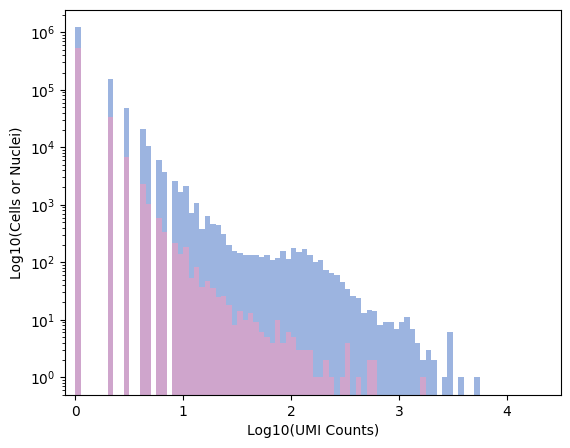

In [21]:
plt.figure().set_figheight(5)

maximum=np.log10(real_cell['UMI_Count']).max()
plt.hist(np.log10(real_cell['UMI_Count']),bins=np.arange(0, maximum + .05, .05),color='#7294d4',alpha=0.7)
maximum=np.log10(real_nuc['UMI_Count']).max()
plt.hist(np.log10(real_nuc['UMI_Count']),bins=np.arange(0, maximum + .05, .05),color='#e6a0c4',alpha=0.7)

plt.xlabel('Log10(UMI Counts)')
plt.ylabel('Log10(Cells or Nuclei)')
plt.xlim([-.1, 4.5])
plt.yscale('log')
#plt.title('UMIs per Barcode:CBC Combo')
plt.savefig('../figs/fig_6/combo_dist.pdf', bbox_inches='tight', format='pdf')
plt.show()

### Log10(Summed UMIs)

Get some stats on the distribution:

In [26]:
#Make UMI count-summed dataframes
summed_nuc=pd.DataFrame(real_nuc.groupby('CBC')['UMI_Count'].sum())
summed_cell=pd.DataFrame(real_cell.groupby('CBC')['UMI_Count'].sum())

print()
print('Wilcoxon Ranked Sum to compare distributions:')

nuc_dist = summed_nuc['UMI_Count']
cell_dist = summed_cell['UMI_Count']

print('Nuc mean:')
print((nuc_dist.mean()))
print('Nuc median:')
print((nuc_dist.median()))
print('Nuc SEM:')
print(nuc_dist.sem())
print('Cell mean:')
print(cell_dist.mean())
print('Cell median:')
print((cell_dist.median()))
print('Cell SEM:')
print(cell_dist.sem())

print('Wilcoxon Ranked Sum Results:')
print(ranksums(nuc_dist, cell_dist))


Wilcoxon Ranked Sum to compare distributions:
Nuc mean:
93.41673663588021
Nuc median:
80.0
Nuc SEM:
0.9908290350922615
Cell mean:
178.91302749595647
Cell median:
128.0
Cell SEM:
1.5683465478587602
Wilcoxon Ranked Sum Results:
RanksumsResult(statistic=-63.149219707884704, pvalue=0.0)


Plot distribution comparison:

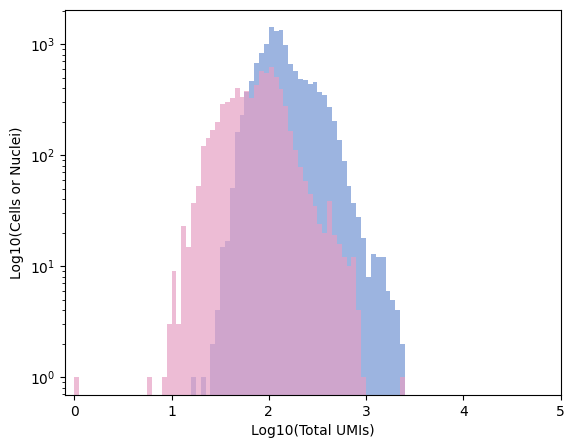

In [28]:
plt.figure().set_figheight(5)

maximum=np.log10(summed_nuc['UMI_Count']).max()
plt.hist(np.log10(summed_cell['UMI_Count']),bins=np.arange(0, maximum + .05, .05),color='#7294d4',alpha=0.7)
maximum=np.log10(summed_nuc['UMI_Count']).max()
plt.hist(np.log10(summed_nuc['UMI_Count']),bins=np.arange(0, maximum + .05, .05),color='#e6a0c4',alpha=0.7)


plt.xlabel('Log10(Total UMIs)')
plt.ylabel('Log10(Cells or Nuclei)')
plt.xlim([-.1, 5])
plt.yscale('log')
#plt.title('UMIs per Barcode:CBC Combo')
plt.savefig('../figs/fig_6/total_counts_dist.pdf', bbox_inches='tight', format='pdf')
plt.show()

### Log10(Summed UMIs vs. Unique Barcodes)

Format data for input into stats and plot

In [29]:
nuc_total_umis=(real_nuc.groupby(['CBC'], as_index=False)['UMI_Count'].sum())
nuc_uniq_bcs=(real_nuc.groupby(['CBC'], as_index=False)['barcode'].nunique())
nuc_mergeddf = pd.merge(nuc_total_umis, nuc_uniq_bcs, on ='CBC')

cell_total_umis=(real_cell.groupby(['CBC'], as_index=False)['UMI_Count'].sum())
cell_uniq_bcs=(real_cell.groupby(['CBC'], as_index=False)['barcode'].nunique())
cell_mergeddf = pd.merge(cell_total_umis, cell_uniq_bcs, on ='CBC')
cell_mergeddf

,CBC,UMI_Count,barcode
0,c1_AAAAAAAAATCGCAGA,65,59
1,c1_AAAAAAACCCTCCCAA,68,56
2,c1_AAAAAACAAGCTAAGC,65,58
3,c1_AAAAAAGCATGGAGGT,150,103
4,c1_AAAAAAGTAGATCAAA,148,119
...,...,...,...
13597,c4_CCTTCCATAAATCCCT,277,192
13598,c4_CCTTCCCTACCCCACT,416,257
13599,c4_CCTTCCGAAGGCATAT,243,191
13600,c4_CCTTCCGCAACACCCT,204,147


Get some stats on this comparison

In [34]:
corr_matrix = np.corrcoef(np.log10(nuc_mergeddf['UMI_Count']), np.log10(nuc_mergeddf['barcode']))
print(stats.spearmanr(np.log10(nuc_mergeddf['UMI_Count']), np.log10(nuc_mergeddf['barcode']),nan_policy="omit"))
corr = corr_matrix[0,1]
R_sq = corr**2
print('Nuc r_squared:')
print(R_sq)
print()

corr_matrix = np.corrcoef(np.log10(cell_mergeddf['UMI_Count']), np.log10(cell_mergeddf['barcode']))
print(stats.spearmanr(np.log10(cell_mergeddf['UMI_Count']), np.log10(cell_mergeddf['barcode']),nan_policy="omit"))
corr = corr_matrix[0,1]
R_sq = corr**2
print('Cell r_squared:')
print(R_sq)

SignificanceResult(statistic=0.9769155477749009, pvalue=0.0)
Nuc r_squared:
0.9473816530859186

SignificanceResult(statistic=0.8510304749058495, pvalue=0.0)
Cell r_squared:
0.7009322046275479


Plot comparisons

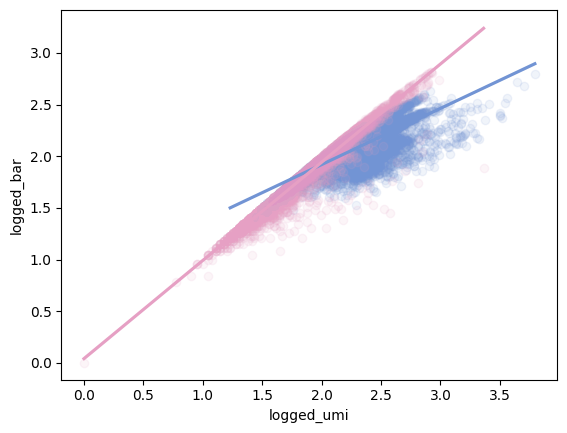

In [36]:
nuc_mergeddf['logged_umi']=np.log10(nuc_mergeddf['UMI_Count'])
nuc_mergeddf['logged_bar']=np.log10(nuc_mergeddf['barcode'])

cell_mergeddf['logged_umi']=np.log10(cell_mergeddf['UMI_Count'])
cell_mergeddf['logged_bar']=np.log10(cell_mergeddf['barcode'])
sns.regplot(data=cell_mergeddf, x='logged_umi', y='logged_bar', color = '#7294d4',scatter_kws={'alpha':0.1})
ax=sns.regplot(data=nuc_mergeddf, x='logged_umi', y='logged_bar', color = '#e6a0c4',scatter_kws={'alpha':0.1})

ax.figure.savefig("../figs/fig_6/total_vs_unique.pdf")

## Transcriptomic comparisons

### Plot cell and nuclei clusters separately

Separate datasets out from metadata table

In [144]:
#Pull metadata rows for cell vs. nuc datasets
cell_datasets=['c1','c2','c3','c4']
cell_metadata = metadata.loc[metadata['datasetid'].isin(cell_datasets)]
nuc_datasets=['n1','n2','n3','n4']
nuc_metadata = metadata.loc[metadata['datasetid'].isin(nuc_datasets)]

#Also pull metadata rows for pooled whole cell and nuc, uninfected datasets
uninf_cell_metadata = metadata.loc[metadata['datasetid'] == 'u1']
uninf_nuc_metadata = metadata.loc[metadata['datasetid'] == 'u2']
uninf_nuc_metadata

,cellbarcode,umap_1,umap_2,dataset_id,celltype,datasetid,broad_class,subclass,high_score,rabies_infected,helper_infected,viral_strain,dissociation_modality,age
37128,u2_AAAAAAAACCGGATAC,-4.023423,-1.802973,u2,EN-Newborn,u2,EN,EN-Immature,0.391944,n,n,uninfected,nuc,gw15-gw21
37129,u2_AAAAAAACAGTGAGGC,-6.178442,-1.215123,u2,EN-Newborn,u2,EN,EN-Immature,0.353476,n,n,uninfected,nuc,gw15-gw21
37130,u2_AAAAAAACATTTAGAT,-7.724061,-4.903410,u2,IN-NCx_dGE-Immature,u2,IN,IN-DGE,0.400427,n,n,uninfected,nuc,gw15-gw21
37131,u2_AAAAAAAGATACAAAC,-5.698223,-0.833388,u2,Unknown,u2,Unknown,Unknown,0.357929,n,n,uninfected,nuc,gw15-gw21
37132,u2_AAAAAAAGATTCACGC,-5.560346,-0.291337,u2,EN-L4-IT,u2,EN,EN-L4-IT,0.500704,n,n,uninfected,nuc,gw15-gw21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49549,u2_CCTTCCGTCCCTAAAT,-4.599879,-1.401042,u2,EN-L2_3-IT,u2,EN,EN-L2_3-IT,0.779973,n,n,uninfected,nuc,gw15-gw21
49550,u2_CCTTCCTACATACCAT,-2.602324,-1.311412,u2,Oligodendrocyte,u2,Glia,Oligo,0.452142,n,n,uninfected,nuc,gw15-gw21
49551,u2_CCTTCCTCAACCAAAG,-5.609817,-1.307925,u2,EN-L4-IT,u2,EN,EN-L4-IT,0.445692,n,n,uninfected,nuc,gw15-gw21
49552,u2_CCTTCCTCCCATACCA,7.746200,4.230875,u2,RG-tRG,u2,Glia,RG,0.626015,n,n,uninfected,nuc,gw15-gw21


Plot datasets based on infection status and dissociation method

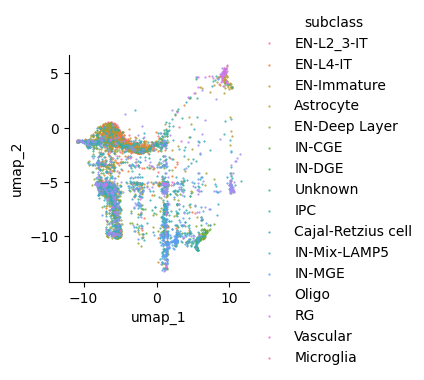

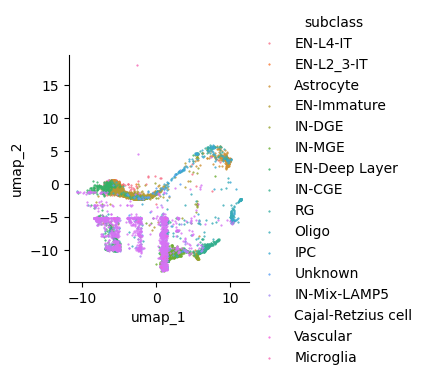

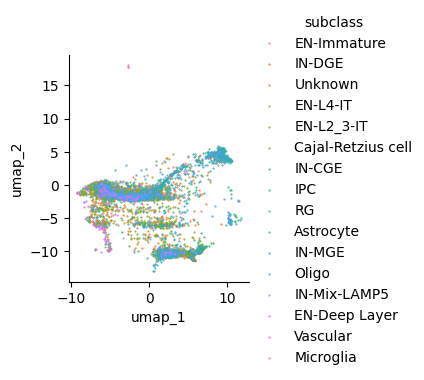

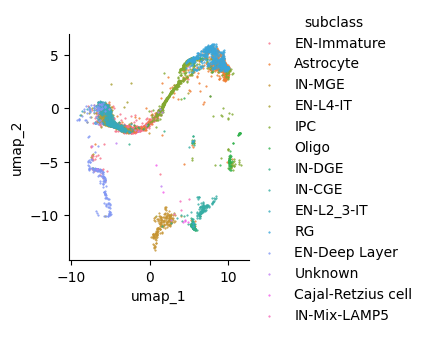

In [146]:
#Infected nuclei
fg = sns.FacetGrid(data=nuc_metadata, hue='subclass', aspect=1)
#fg.map(plt.scatter, 'umap_1', 'umap_2').add_legend()
fg.map(plt.scatter, 'umap_1', 'umap_2', s=1, marker='.').add_legend()
fg.savefig('../figs/fig_6/nuc_umap.pdf', dpi=300)

#Infected nuclei
fg = sns.FacetGrid(data=cell_metadata, hue='subclass', aspect=1)
#fg.map(plt.scatter, 'umap_1', 'umap_2').add_legend()
fg.map(plt.scatter, 'umap_1', 'umap_2', s=1, marker='.').add_legend()
fg.savefig('../figs/fig_6/cell_umap.pdf', dpi=300)

#Uninfected nuclei
fg = sns.FacetGrid(data=uninf_nuc_metadata, hue='subclass', aspect=1)
#fg.map(plt.scatter, 'umap_1', 'umap_2').add_legend()
fg.map(plt.scatter, 'umap_1', 'umap_2', s=1, marker='.').add_legend()
fg.savefig('../figs/fig_6/uninf_nuc_umap.pdf', dpi=300)

#Infected nuclei
fg = sns.FacetGrid(data=uninf_cell_metadata, hue='subclass', aspect=1)
#fg.map(plt.scatter, 'umap_1', 'umap_2').add_legend()
fg.map(plt.scatter, 'umap_1', 'umap_2', s=1, marker='.').add_legend()
fg.savefig('../figs/fig_6/uninf_cell_umap.pdf', dpi=300)

### Stacked bar plot of cell type proportions across datasets

Calculate cell type proportions across each dataset

In [88]:
final_props=metadata[['subclass']]
final_props=final_props.drop_duplicates().reset_index()

temp = metadata.loc[metadata['datasetid'] == 'n1']
props=pd.DataFrame(temp['subclass'].value_counts()).reset_index()
props = props[props.subclass != 'Unknown']
props['proportion']=props['count']/props['count'].sum()
props

final_props = final_props.merge(props[['subclass', 'proportion']], on='subclass', how='left')


temp = metadata.loc[metadata['datasetid'] == 'n2']
props=pd.DataFrame(temp['subclass'].value_counts()).reset_index()
props = props[props.subclass != 'Unknown']
props[f'{i}_proportion']=props['count']/props['count'].sum()
props

final_props = final_props.merge(props[['subclass', 'proportion']], on='subclass', how='left')

print(final_props)


    index            subclass  proportion_x  proportion_y
0       0          EN-L2_3-IT      0.527062      0.441459
1       1         EN-Immature      0.157646      0.067818
2       4                 IPC      0.005155      0.014715
3       9              IN-MGE      0.009021      0.044786
4      12           Astrocyte      0.020619      0.021753
5      15                 NaN           NaN           NaN
6      35              IN-DGE      0.010309      0.008317
7      51           Microglia           NaN           NaN
8      59               Oligo      0.013746      0.057582
9      62            EN-L4-IT      0.209622      0.063980
10     76                  RG      0.003007      0.010877
11    107             Unknown           NaN           NaN
12    128              IN-CGE      0.009450      0.029431
13    359       EN-Deep Layer      0.024055      0.061420
14    423  Cajal-Retzius cell      0.008162      0.155470
15    920            Vascular           NaN      0.002559
16   4000     

In [131]:
def calculate_props(dataset_list #list of dataset IDs to be pulled from metadata file
                   ):
    
    final_props=metadata[['subclass']]
    final_props=final_props.drop_duplicates().reset_index()

    for i in dataset_list:
        temp = metadata.loc[metadata['datasetid'] == i]
        props=pd.DataFrame(temp['subclass'].value_counts()).reset_index()
        props = props[props.subclass != 'Unknown']
        props[f'{i}_proportion']=props['count']/props['count'].sum()
        final_props = final_props.merge(props[['subclass', f'{i}_proportion']], on='subclass', how='left')

    transposed_props=final_props.T
    transposed_props.columns = transposed_props.iloc[1]
    transposed_props = transposed_props[2:]

    #Drop unknown columns
    transposed_props=transposed_props.drop(columns=['Unknown'])
    transposed_props= transposed_props.fillna(0)
    
    return transposed_props


In [132]:
#Run calculate_props() function for paired slice datasets
dataset_list=['c1','c2','c3','c4','n1','n2','n3','n4']
final_props=calculate_props(dataset_list)
final_props

subclass,EN-L2_3-IT,EN-Immature,IPC,IN-MGE,Astrocyte,NaN,IN-DGE,Microglia,Oligo,EN-L4-IT,RG,IN-CGE,EN-Deep Layer,Cajal-Retzius cell,Vascular,IN-Mix-LAMP5
c1_proportion,0.192090,0.235550,0.011299,0.022599,0.115602,0,0.012169,0.000000,0.032160,0.223816,0.012603,0.014776,0.127336,0.000000,0.000000,0.000000
c2_proportion,0.264249,0.435003,0.010248,0.076454,0.009902,0,0.016005,0.000000,0.010248,0.137363,0.002648,0.035003,0.000806,0.000115,0.000000,0.001957
c3_proportion,0.004209,0.002525,0.000000,0.012626,0.004209,0,0.000000,0.000000,0.110269,0.006734,0.000000,0.003367,0.042929,0.724747,0.002525,0.085859
c4_proportion,0.018950,0.041545,0.000000,0.013120,0.007289,0,0.000000,0.000729,0.083090,0.102770,0.000000,0.004373,0.083090,0.577259,0.003644,0.064140
n1_proportion,0.527062,0.157646,0.005155,0.009021,0.020619,0,0.010309,0.000000,0.013746,0.209622,0.003007,0.009450,0.024055,0.008162,0.000000,0.002148
n2_proportion,0.441459,0.067818,0.014715,0.044786,0.021753,0,0.008317,0.000000,0.057582,0.063980,0.010877,0.029431,0.061420,0.155470,0.002559,0.019834
n3_proportion,0.085235,0.109455,0.003260,0.051700,0.012576,0,0.008384,0.001397,0.071262,0.085235,0.005589,0.016302,0.306008,0.222170,0.003726,0.017699
n4_proportion,0.179296,0.074707,0.013874,0.067236,0.016009,0,0.008538,0.000000,0.108858,0.099253,0.008538,0.045891,0.145144,0.211313,0.000000,0.021345


In [137]:
#Sort cell types for input into stacked bar plot
final_props=final_props[['Vascular',
                         'Microglia',
                         'Oligo',
                         'Astrocyte',
                         'RG',
                         'IPC',
                         'EN-Immature',
                         'EN-L2_3-IT',
                         'EN-L4-IT',
                         'EN-Deep Layer',
                         'Cajal-Retzius cell',
                         'IN-CGE',
                         'IN-MGE',
                         'IN-DGE',
                         'IN-Mix-LAMP5'
                        ]]
final_props['dataset'] = final_props.index

Plot stacked bar plot for each dataset

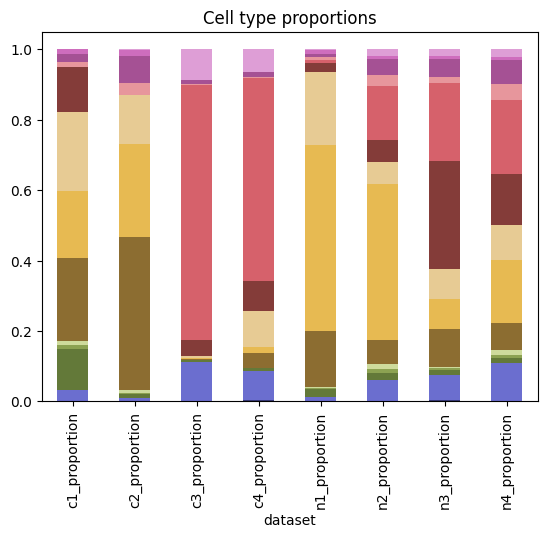

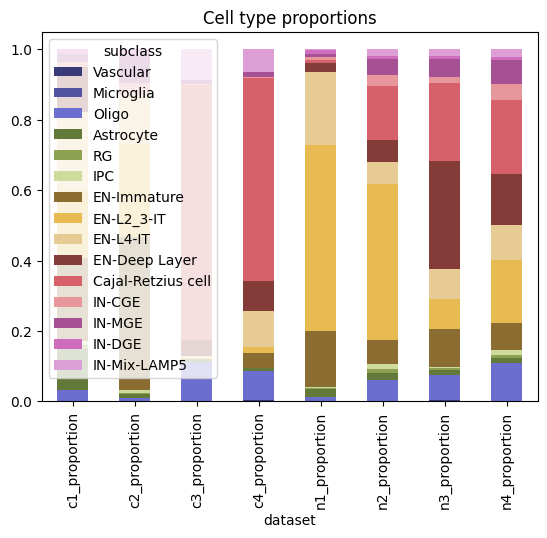

In [142]:
# plot data in stack manner of bar type
final_props.plot(x='dataset', 
                 kind='bar', 
                 stacked=True,
                 title='Cell type proportions',
                 legend=False,
                 colormap='tab20b'
                )

plt.savefig('../figs/fig_6/stacked_cell_types.pdf', bbox_inches='tight', format='pdf')
plt.show()


#And with legend for recoloring later in illustrator
final_props.plot(x='dataset', 
                 kind='bar', 
                 stacked=True,
                 title='Cell type proportions',
                 legend=True,
                 colormap='tab20b'
                )

plt.savefig('../figs/fig_6/stacked_cell_types_w_legend.pdf', bbox_inches='tight', format='pdf')
plt.show()